In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
    return G

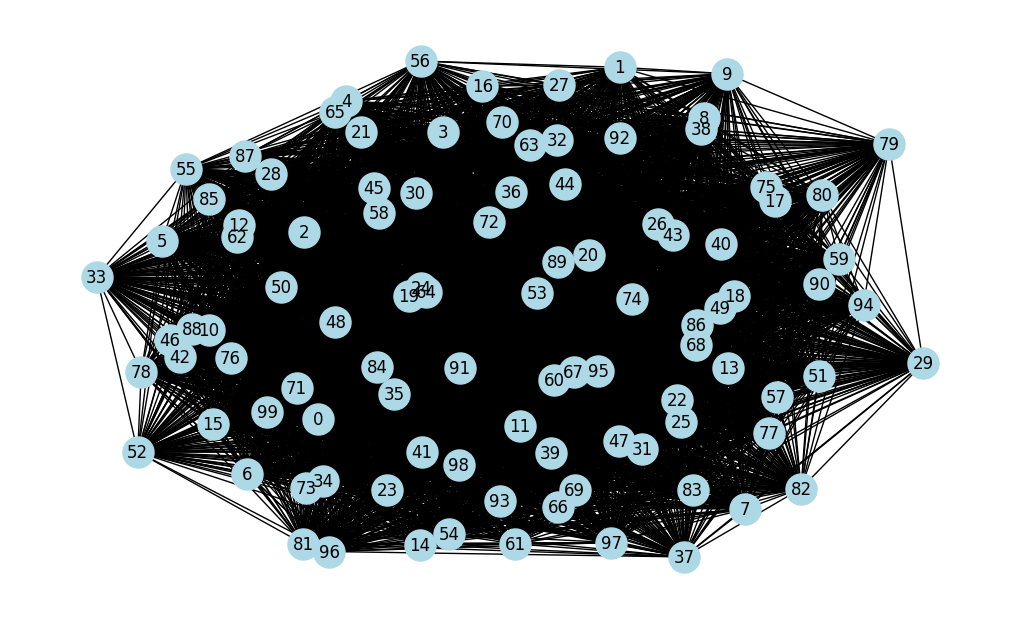

In [4]:
G = gnp_random_connected_graph(100, 1, False, True)

# For Task 1

## Kruskal's algorithm

In [5]:
from networkx.algorithms import tree

In [6]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

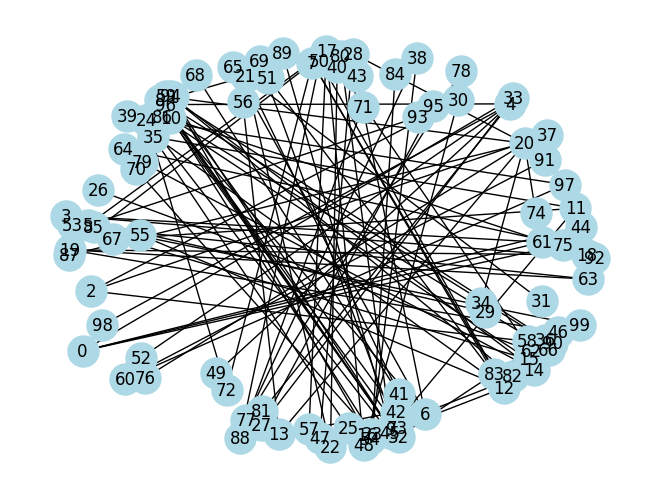

In [7]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [8]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 33), (0, 44), (0, 61), (0, 75), (1, 9), (1, 20), (1, 21), (1, 54), (1, 82), (2, 30), (2, 37), (2, 58), (3, 29), (3, 61), (3, 92), (4, 98), (4, 49), (4, 52), (4, 81), (4, 96), (5, 17), (5, 93), (5, 99), (6, 10), (6, 43), (6, 65), (7, 19), (7, 12), (7, 17), (7, 72), (7, 83), (8, 9), (8, 23), (8, 36), (8, 73), (9, 10), (9, 11), (9, 16), (9, 80), (9, 89), (9, 96), (10, 66), (10, 92), (11, 35), (11, 67), (12, 39), (12, 50), (12, 51), (12, 54), (12, 55), (13, 20), (13, 56), (14, 15), (14, 16), (14, 79), (14, 94), (15, 53), (15, 86), (16, 30), (17, 48), (17, 57), (17, 62), (18, 19), (19, 46), (19, 63), (20, 28), (20, 34), (20, 74), (20, 76), (20, 87), (21, 22), (21, 31), (21, 41), (22, 40), (23, 38), (23, 70), (23, 84), (24, 45), (24, 72), (24, 97), (25, 35), (26, 62), (27, 33), (27, 95), (28, 47), (32, 36), (32, 69), (38, 77), (41, 68), (42, 57), (42, 59), (50, 88), (59, 90), (60, 91), (60, 97), (63, 85), (64, 75), (71, 88), (77, 78)]),
 99)

In [9]:
def kruskal(graph):
    if isinstance(graph, nx.DiGraph):
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    G.add_nodes_from(graph.nodes)

    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])

    parent = {node: node for node in graph.nodes}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        parent[root_u] = root_v

    for u, v, w in edges:
        if find(u) != find(v):
            G.add_edge(u, v, weight=w['weight'])
            union(u, v)
    nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
    return G


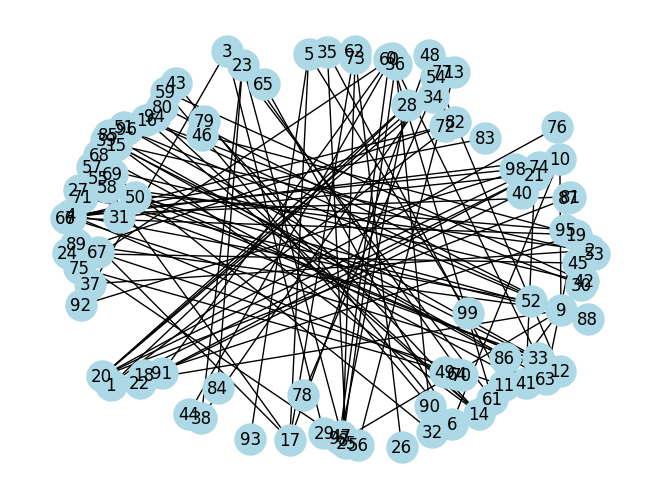

In [10]:
kruskal(G)

## Prim's algorithm

In [11]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

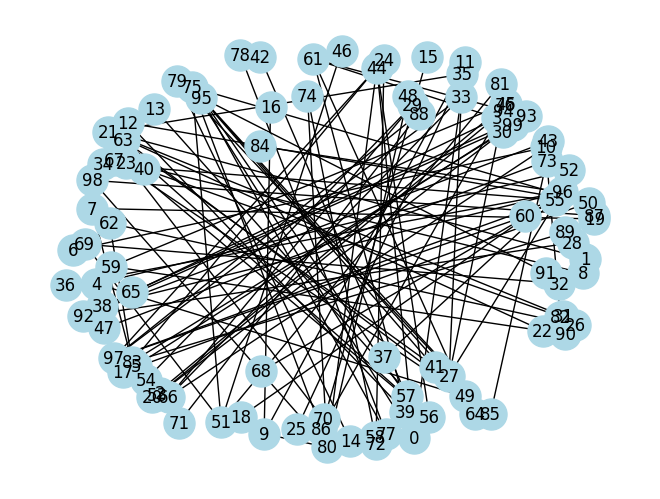

In [12]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [13]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 33), (0, 44), (0, 61), (0, 75), (1, 21), (2, 30), (3, 61), (3, 92), (4, 49), (4, 52), (5, 93), (6, 10), (7, 83), (7, 19), (8, 23), (9, 80), (9, 11), (9, 16), (10, 66), (10, 82), (12, 50), (12, 39), (13, 56), (14, 79), (15, 86), (17, 50), (18, 96), (20, 76), (21, 56), (21, 22), (21, 31), (21, 35), (21, 41), (23, 56), (23, 70), (24, 97), (24, 72), (25, 35), (26, 62), (27, 33), (27, 76), (27, 95), (27, 96), (28, 92), (29, 66), (29, 54), (30, 83), (32, 69), (33, 66), (33, 97), (34, 55), (36, 96), (37, 55), (38, 96), (40, 82), (42, 57), (43, 92), (44, 56), (44, 80), (44, 83), (45, 86), (45, 59), (46, 51), (47, 73), (48, 80), (49, 61), (49, 67), (50, 75), (51, 75), (51, 69), (51, 81), (53, 66), (53, 94), (55, 97), (55, 68), (57, 95), (58, 74), (59, 90), (60, 97), (61, 93), (62, 83), (63, 85), (64, 75), (65, 93), (71, 88), (73, 85), (74, 80), (75, 85), (75, 86), (77, 95), (77, 78), (79, 85), (80, 98), (83, 89), (84, 96), (87, 98), (88, 97), (91, 95), (92, 99)]),
 99)

In [14]:
def prim(graph):
    # Initialize sets U (visited vertices) and V-U (unvisited vertices)
    U = set()
    V_U = set(graph.nodes)

    # Choose an arbitrary starting vertex
    start_vertex = next(iter(V_U))
    U.add(start_vertex)
    V_U.remove(start_vertex)

    if isinstance(graph, nx.DiGraph):
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    while V_U:
        # Find the minimum weight edge connecting a vertex in U to a vertex in V-U
        min_weight = float('inf')
        min_edge = None
        for u in U:
            for v in V_U:
                if graph.has_edge(u, v):
                    weight = graph[u][v]['weight']
                    if weight < min_weight:
                        min_weight = weight
                        min_edge = (u, v)

        # Add the minimum weight edge to the minimum spanning tree
        G.add_edge(*min_edge, weight=min_weight)

        # Move the destination vertex of the minimum weight edge from V-U to U
        U.add(min_edge[1])
        V_U.remove(min_edge[1])
    nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)
    return G

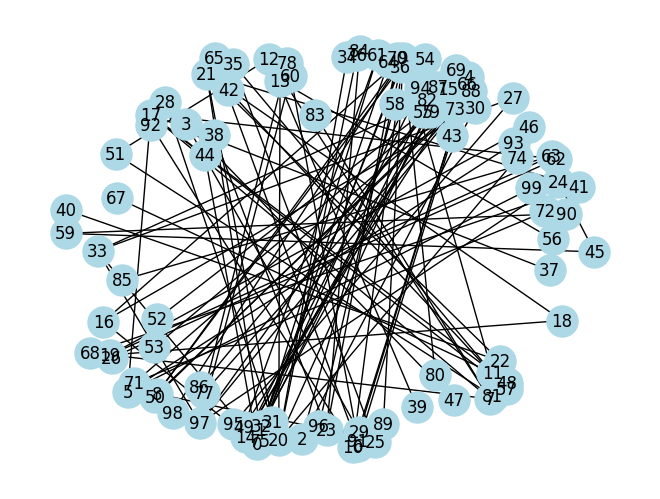

In [15]:
prim(G)

## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [29]:
import time
from tqdm import tqdm


In [30]:
NUM_OF_ITERATIONS=100
def count_time(function, size):
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):

        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        function(G)
        end = time.time()

        time_taken += end - start

    return time_taken / NUM_OF_ITERATIONS

Kruscal's algorithm

1)Алгоритм крускала

Спочатку ребра в графі сортуються за вагою, як показано в алгоритмі крускала. Також використали функцію find() щоб перевірити чи належать вершини до однієї кореневої вершини чи ні, щоб не було циклів. Використали функцію Union щоб поєднувати вершини. Потім код перебирає ребра в посортованому графі: якщо дві вершини не належать до одного і того ж кореня, то вони коренем другої стає перша і вони обʼєднуються, а в граф новий додається це ребро. Потім повертається каркас мінімальної ваги. Алгоритм працює краще з меншою кількістю ребер, адже тоді йде менше викликів функцій find та union, що зменшує час роботи алгоритму. Через це ми зробили перевірку лише на 100 ітераціях, адже воно б займало 3 години на пропрацювання всіх функцій.

 23%|██▎       | 23/100 [00:00<00:00, 224.06it/s]

100%|██████████| 100/100 [00:14<00:00,  6.98it/s]


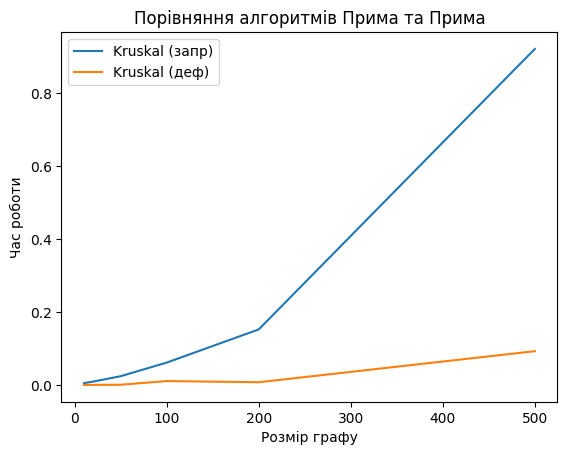

In [31]:
def kruskal_def(G):
    return tree.minimum_spanning_tree(G, algorithm="kruskal")

graph_sizes = [10, 20, 50, 100, 200, 500]
kruskal_mine = [count_time(kruskal, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (запрограмованого)
kruskal_defined = [count_time(kruskal_def, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (дефолтного)
plt.clf()
plt.plot(graph_sizes, kruskal_mine, label='Kruskal (запр)')
plt.plot(graph_sizes, kruskal_defined, label='Kruskal (деф)')
plt.xlabel('Розмір графу')
plt.ylabel('Час роботи')
plt.title('Порівняння алгоритмів Прима та Прима')
plt.legend()
plt.show()

Коди працюють доволі швидко, на більних графах наш алгоритм починає втрачати швидкість, але поступово

Prim's algorithm

2)Алгоритм Пріма

Зробили 2 сети вершин, одні-ті що код вже відвідав, інші-ті що ще не відвідав. Потім код у вершинах які відвідав шукав ребра з найменшою вагою з вершинами які не відвідав, після чого додавав ребро до графу, а нову відвідану вершину до відвіданих вершин. Раниться код теж дуже довго, адже пошук найменшого ребра займає купу часу, бо код перевіряє вагу з кожною не відміченою вершиною, що забирає час.

100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


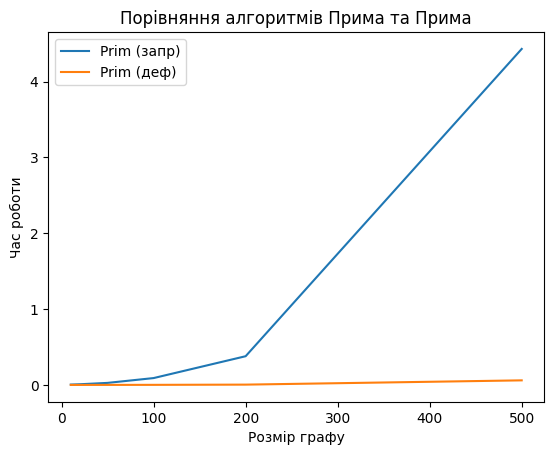

In [32]:
def prim_def(G):
    return tree.minimum_spanning_tree(G, algorithm="prim")
graph_sizes = [10, 20, 50, 100, 200, 500]
prim_mine = [count_time(prim, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (запрограмованого)
prim_defult = [count_time(prim_def, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (дефолтного)
plt.clf()
plt.plot(graph_sizes, prim_mine, label='Prim (запр)')
plt.plot(graph_sizes, prim_defult, label='Prim (деф)')
plt.xlabel('Розмір графу')
plt.ylabel('Час роботи')
plt.title('Порівняння алгоритмів Прима та Прима')
plt.legend()
plt.show()

Загалом код працював порівняно непогано, всього в 40 разів повільніше, але це через кількість перевірок, що виконуються в коді